In [842]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,LassoCV,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve, auc, RocCurveDisplay,recall_score,roc_auc_score,davies_bouldin_score
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest,RandomForestRegressor
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
import streamlit as st
import joblib
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

In [844]:
df=pd.read_csv('Mall_Customers.csv')

In [846]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [847]:
df.shape

(200, 5)

In [849]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [851]:
df.duplicated().sum()

0

In [852]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [853]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [854]:
df.drop(columns=['CustomerID'],axis=1,inplace=True)

In [856]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [859]:
plt.style.use('dark_background')

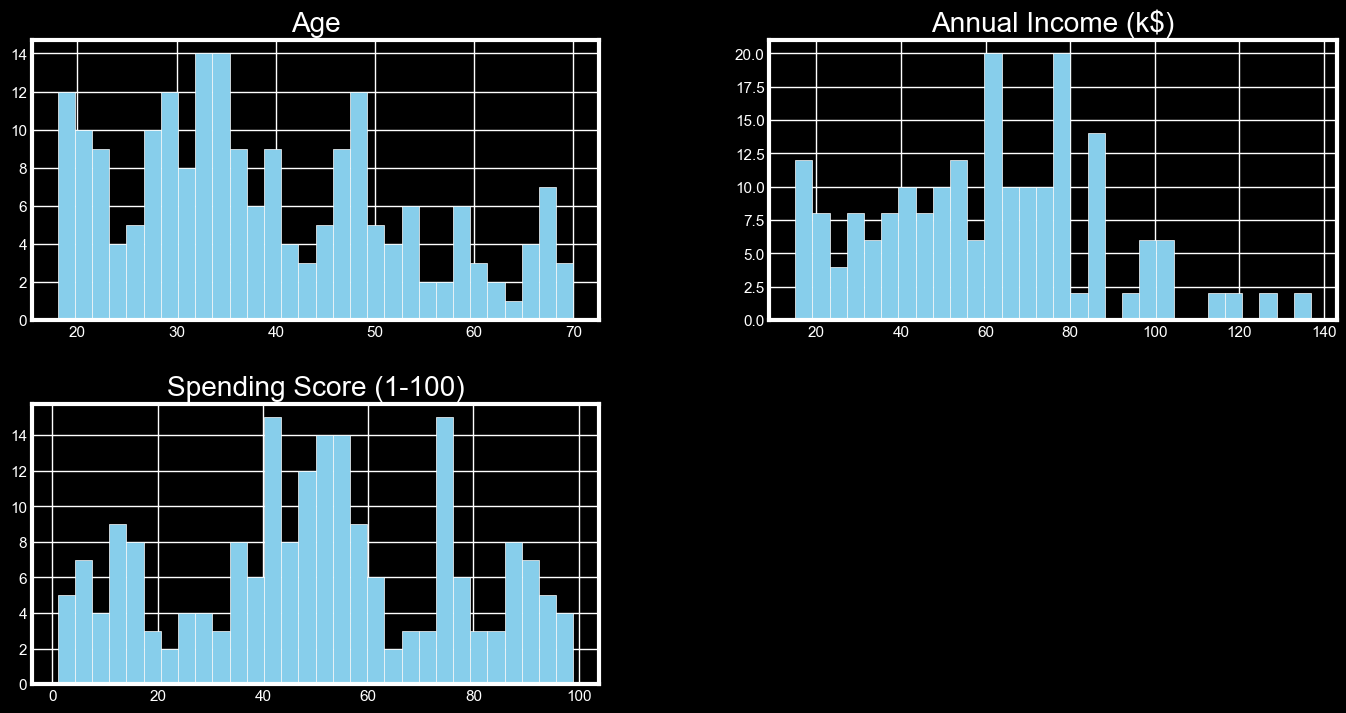

In [863]:
df.hist(bins=30,color='skyblue',figsize=(15,7))
plt.show()

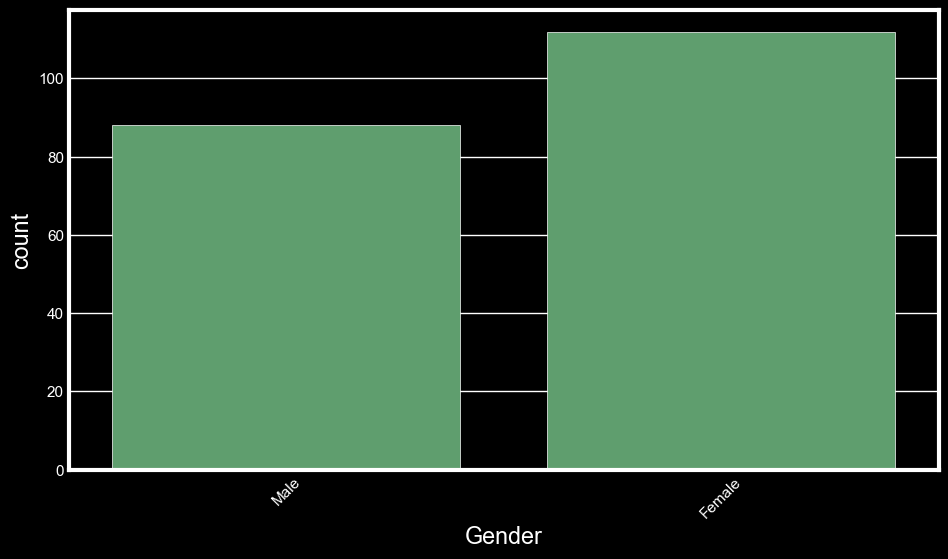

In [865]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x=df['Gender'],color='g')
plt.xticks(rotation=45)
plt.show()

In [866]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


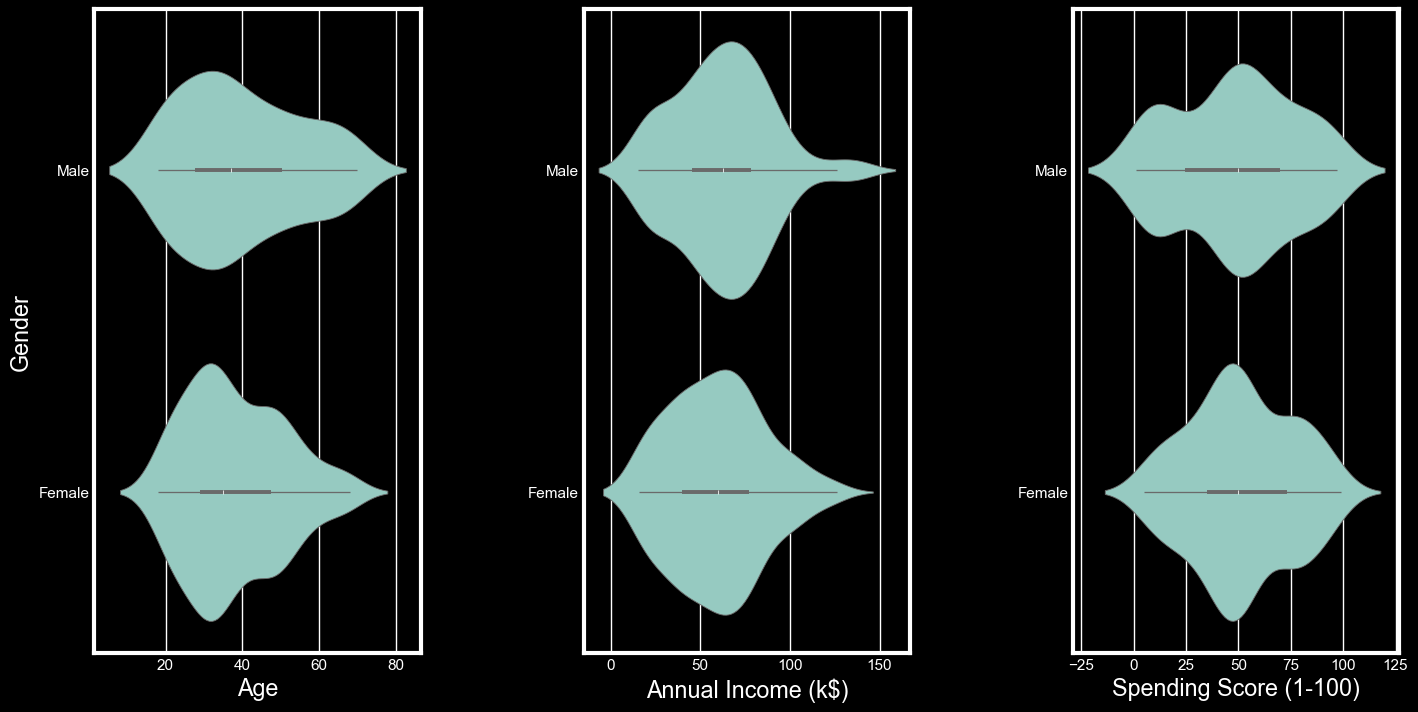

In [867]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age','Annual Income (k$)'	,'Spending Score (1-100)']:
    plt.style.use('dark_background')
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Gender',data=df)
    plt.ylabel('Gender' if n ==1 else '')
plt.show()

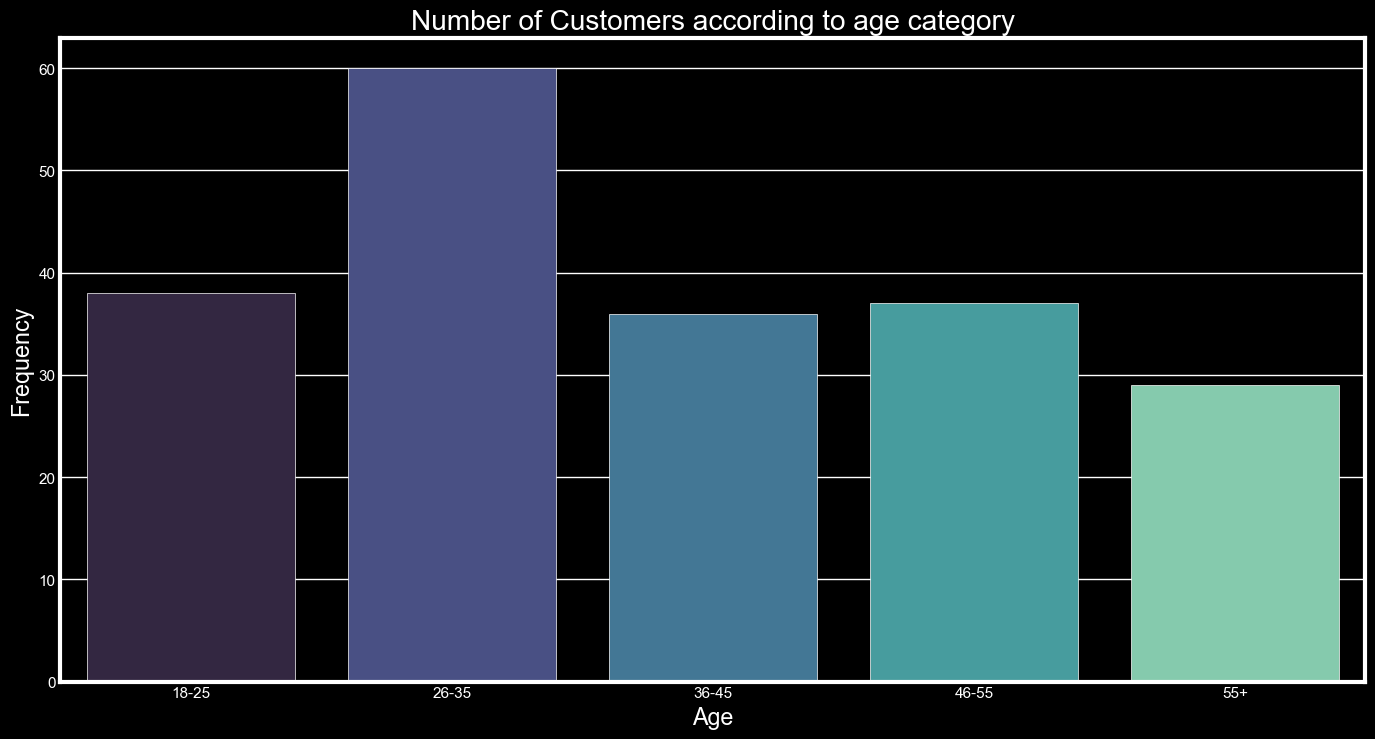

In [868]:
age_18_25   = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35   = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45   = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55   = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_above_55 = df.Age[(df.Age >= 56)]

agex=['18-25','26-35','36-45','46-55','55+']
agey=[len(age_18_25),len(age_26_35),len(age_36_45),len(age_46_55),len(age_above_55)]

plt.figure(figsize=(15,7))
sns.barplot(x=agex,y=agey,palette='mako')
plt.title('Number of Customers according to age category')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

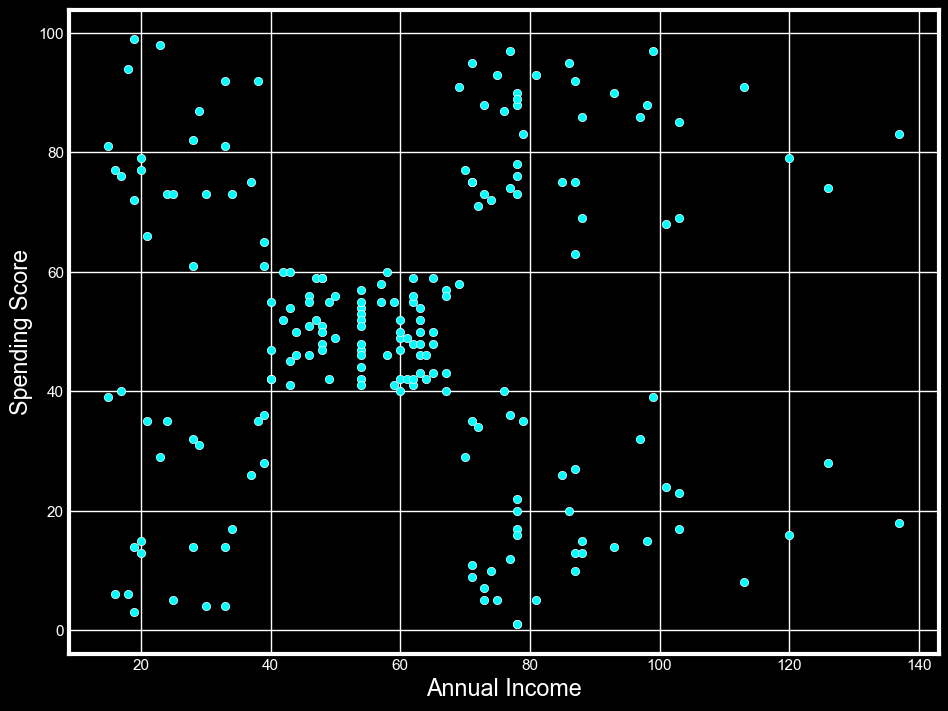

In [869]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,color='cyan')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

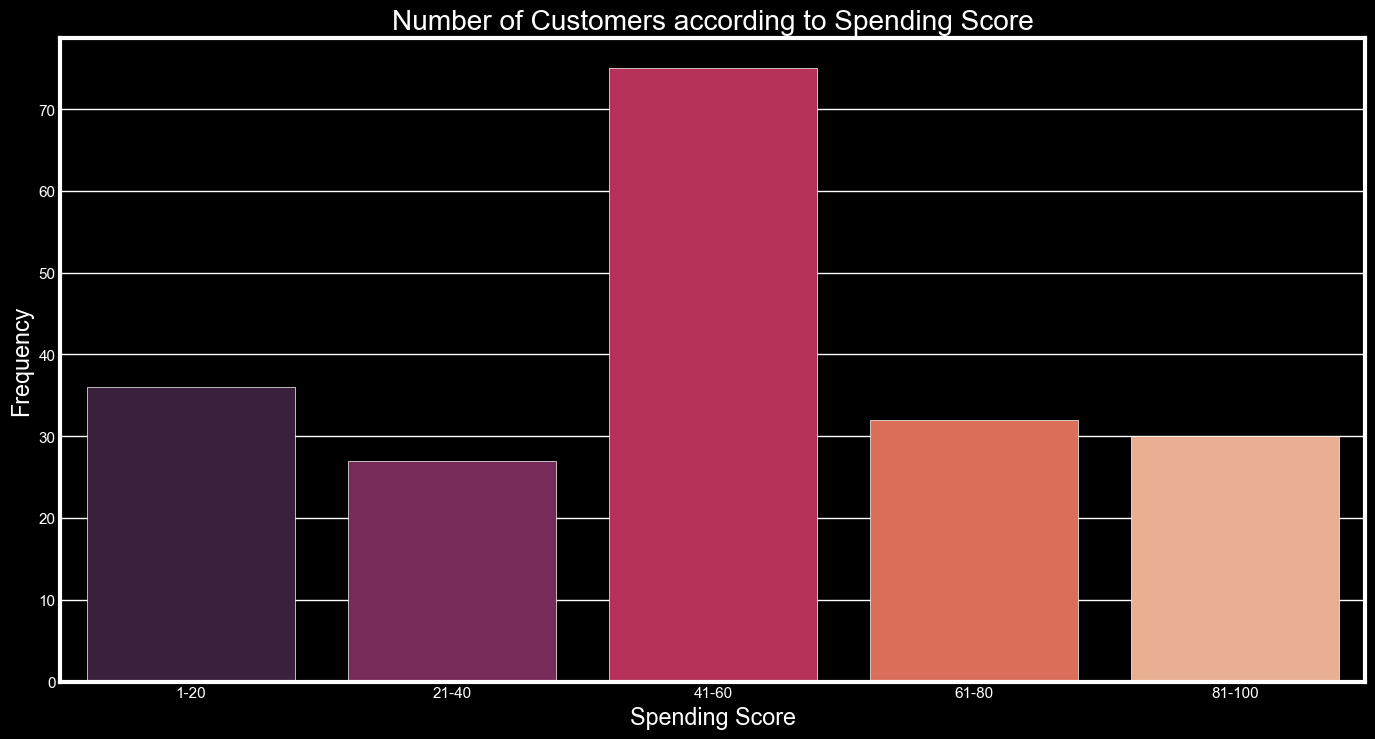

In [870]:
ss_1_20=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=1) & (df['Spending Score (1-100)']<=20)]
ss_21_40=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21) & (df['Spending Score (1-100)']<=40)]
ss_41_60=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41) & (df['Spending Score (1-100)']<=60)]
ss_61_80=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61) & (df['Spending Score (1-100)']<=80)]
ss_81_100=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81) & (df['Spending Score (1-100)']<=100)]

ssx=['1-20','21-40','41-60','61-80','81-100']
ssy=[len(ss_1_20),len(ss_21_40),len(ss_41_60),len(ss_61_80),len(ss_81_100)]

plt.figure(figsize=(15,7))
sns.barplot(x=ssx,y=ssy,palette='rocket')
plt.title('Number of Customers according to Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

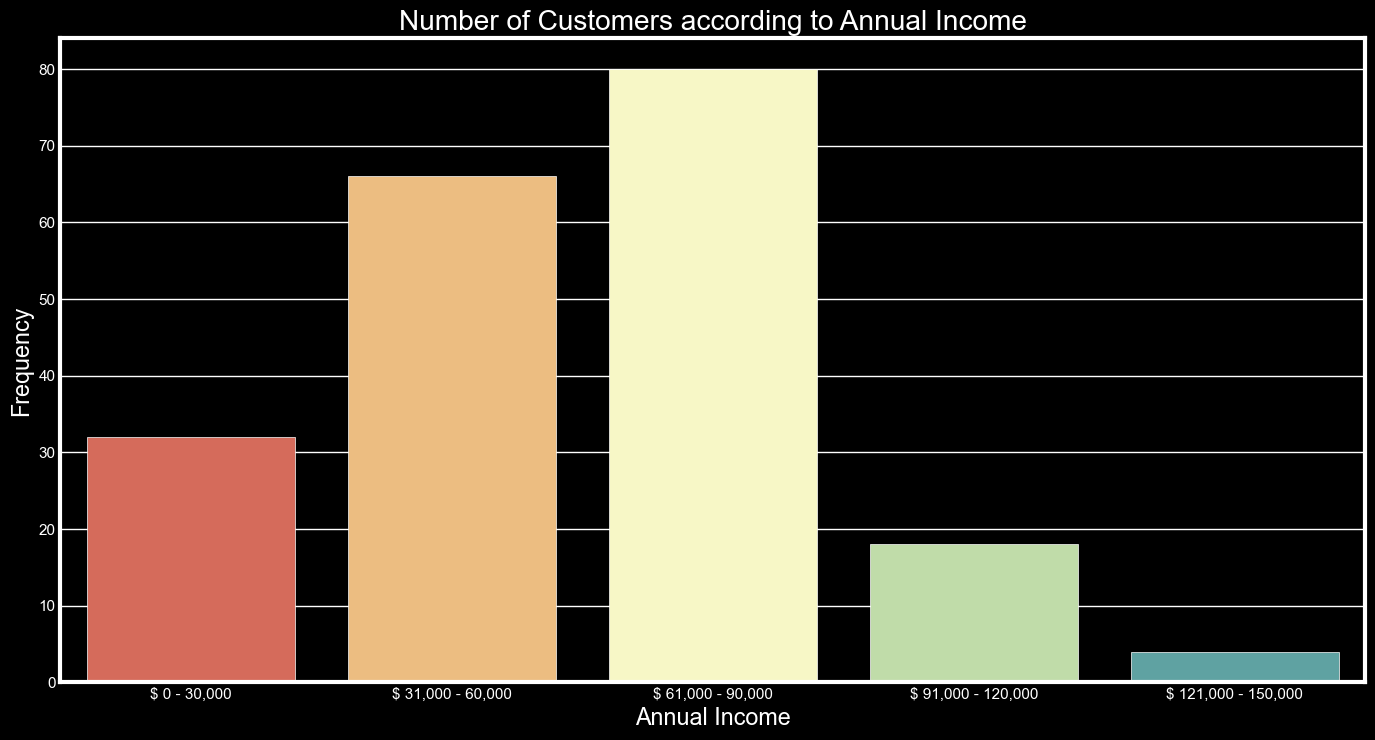

In [871]:
ai_0_30=df['Annual Income (k$)'][(df['Annual Income (k$)'] >=0) & (df['Annual Income (k$)']<=30)]
ai_31_60=df['Annual Income (k$)'][(df['Annual Income (k$)']>=31)&(df['Annual Income (k$)']<=60)]
ai_61_90=df['Annual Income (k$)'][(df['Annual Income (k$)']>=61)& (df['Annual Income (k$)']<=90)]
ai_91_120=df['Annual Income (k$)'][(df['Annual Income (k$)']>=91)& (df['Annual Income (k$)']<=120)]
ai_121_150=df['Annual Income (k$)'][(df['Annual Income (k$)']>=121)&(df['Annual Income (k$)']<=150)]

aix=['$ 0 - 30,000','$ 31,000 - 60,000','$ 61,000 - 90,000','$ 91,000 - 120,000','$ 121,000 - 150,000']
aiy=[len(ai_0_30),len(ai_31_60),len(ai_61_90),len(ai_91_120),len(ai_121_150)]

plt.figure(figsize=(15,7))
sns.barplot(x=aix,y=aiy,palette='Spectral')
plt.title('Number of Customers according to Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

In [872]:
x1=df[['Age','Spending Score (1-100)']]
x1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


k=1, silhouette=0.500
k=2, silhouette=0.500
k=3, silhouette=0.500
k=4, silhouette=0.500
k=5, silhouette=0.500
k=6, silhouette=0.500
k=7, silhouette=0.500
k=8, silhouette=0.500
k=9, silhouette=0.500
k=10, silhouette=0.500


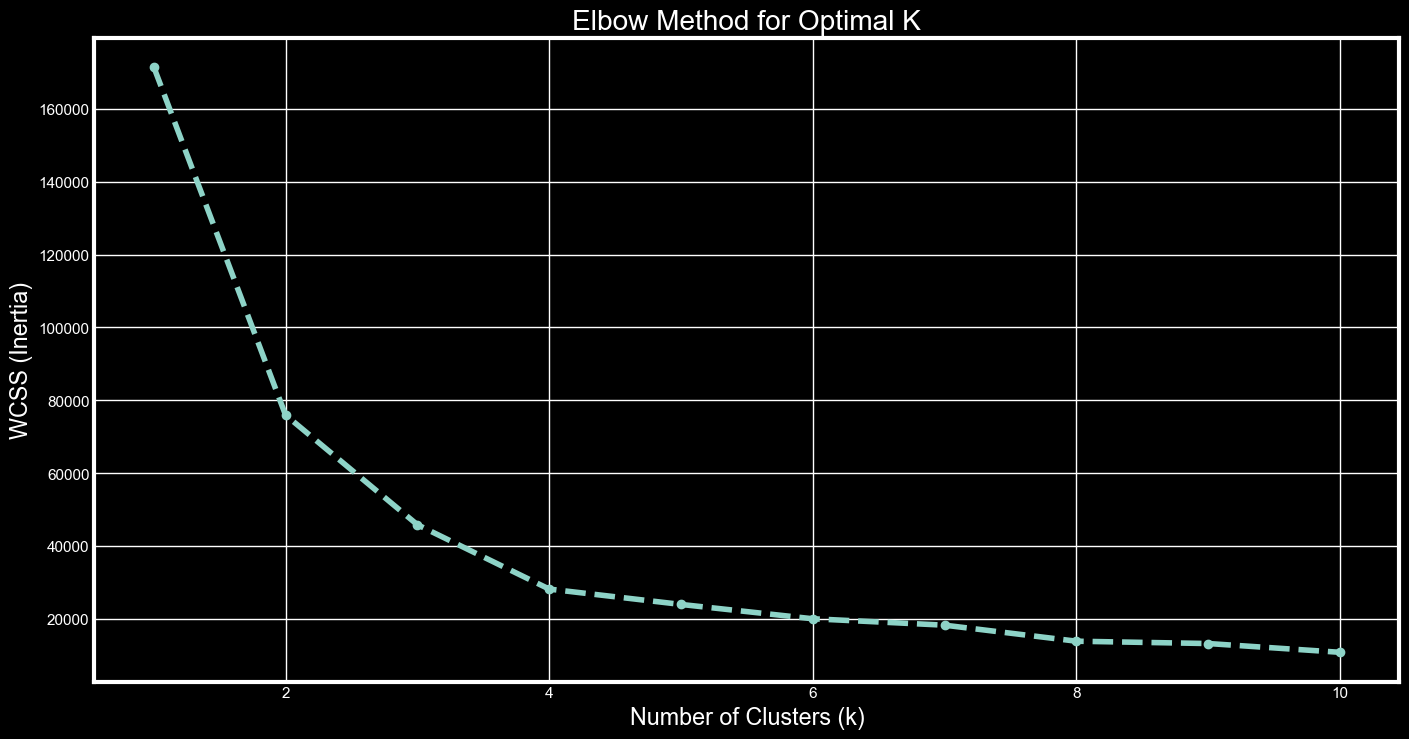

In [873]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(x1, label_1)
    print(f"k={k}, silhouette={score:.3f}")


plt.figure(figsize=(15,7))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [874]:
kmeans=KMeans(n_clusters=4,random_state=42)
label_1=kmeans.fit_predict(x1)
print(label_1)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [875]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


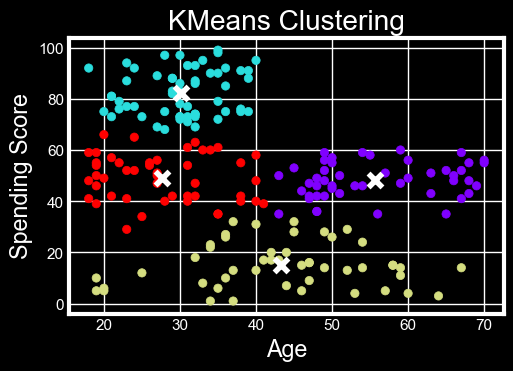

In [876]:
plt.figure(figsize=(5,3))
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='white',marker='x',s=100)
plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [877]:
x2=df[['Annual Income (k$)','Spending Score (1-100)']]
x2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


k=1, silhouette=0.554
k=2, silhouette=0.554
k=3, silhouette=0.554
k=4, silhouette=0.554
k=5, silhouette=0.554
k=6, silhouette=0.554
k=7, silhouette=0.554
k=8, silhouette=0.554
k=9, silhouette=0.554
k=10, silhouette=0.554


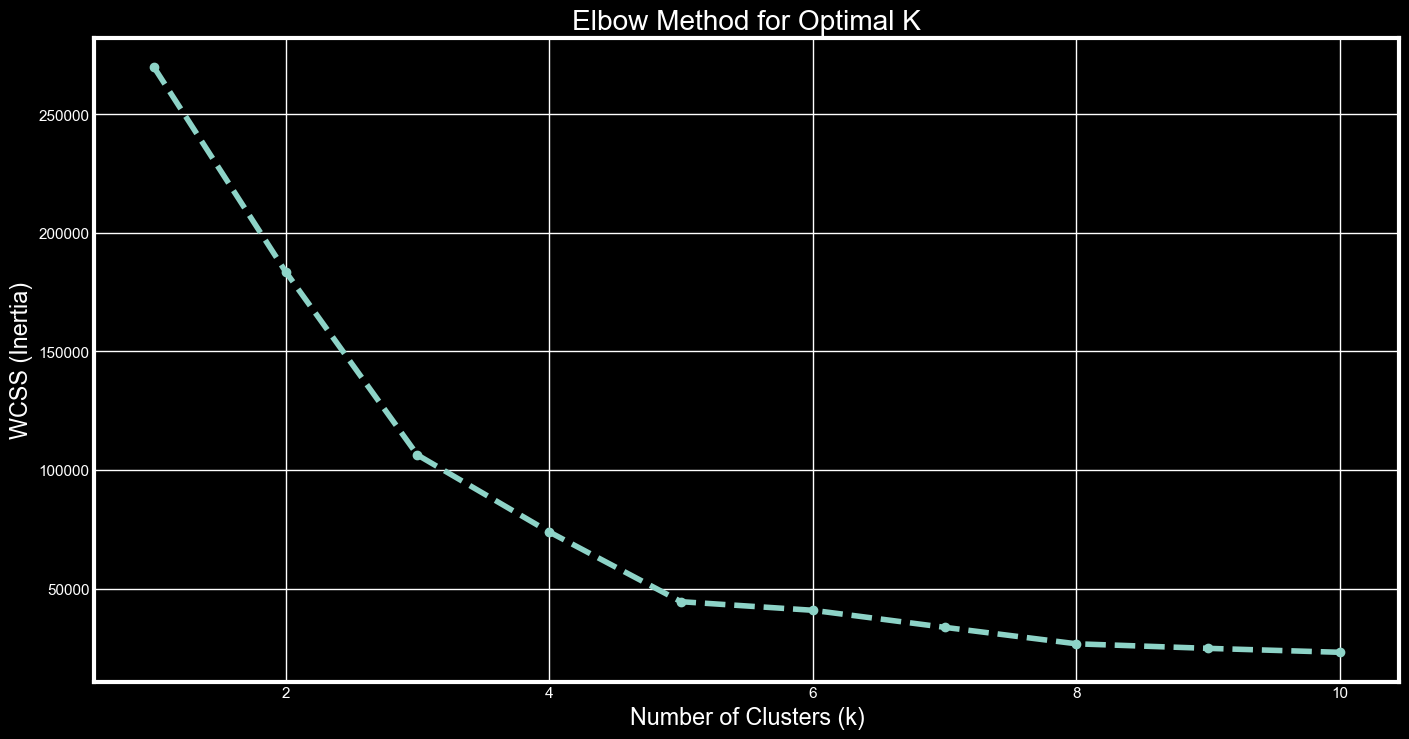

In [878]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)   
    score = silhouette_score(x2, label_2)
    print(f"k={k}, silhouette={score:.3f}")


plt.figure(figsize=(15,7))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [879]:
kmeans=KMeans(n_clusters=5,random_state=42)
label_2=kmeans.fit_predict(x2)
print(label_2)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [880]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


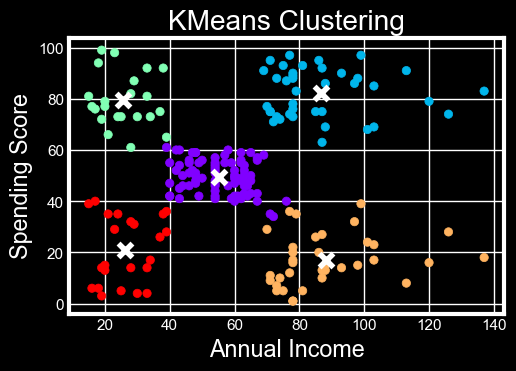

In [881]:
plt.figure(figsize=(5,3))
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='white',marker='x',s=100)
plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [882]:
x3=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
x3

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


k=1, silhouette=0.358
k=2, silhouette=0.358
k=3, silhouette=0.358
k=4, silhouette=0.358
k=5, silhouette=0.358
k=6, silhouette=0.358
k=7, silhouette=0.358
k=8, silhouette=0.358
k=9, silhouette=0.358
k=10, silhouette=0.358


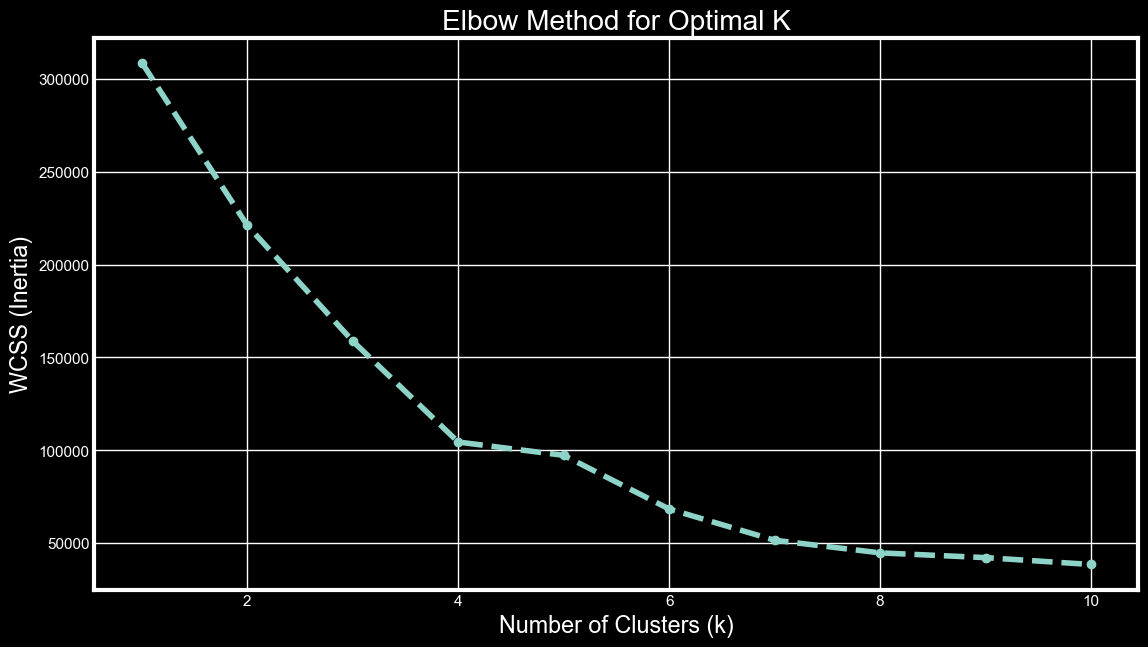

In [884]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(x3, label_3)
    print(f"k={k}, silhouette={score:.3f}")


plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [885]:
kmeans=KMeans(n_clusters=5,random_state=42)
label_3=kmeans.fit_predict(x3)
print(label_3)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 4 0 0 0 4 0 0 0 0 4 0 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [886]:
print(kmeans.cluster_centers_)

[[ 46.21348315  47.71910112  41.79775281]
 [ 32.45454545 108.18181818  82.72727273]
 [ 24.68965517  29.5862069   73.65517241]
 [ 40.39473684  87.          18.63157895]
 [ 31.78787879  76.09090909  77.75757576]]


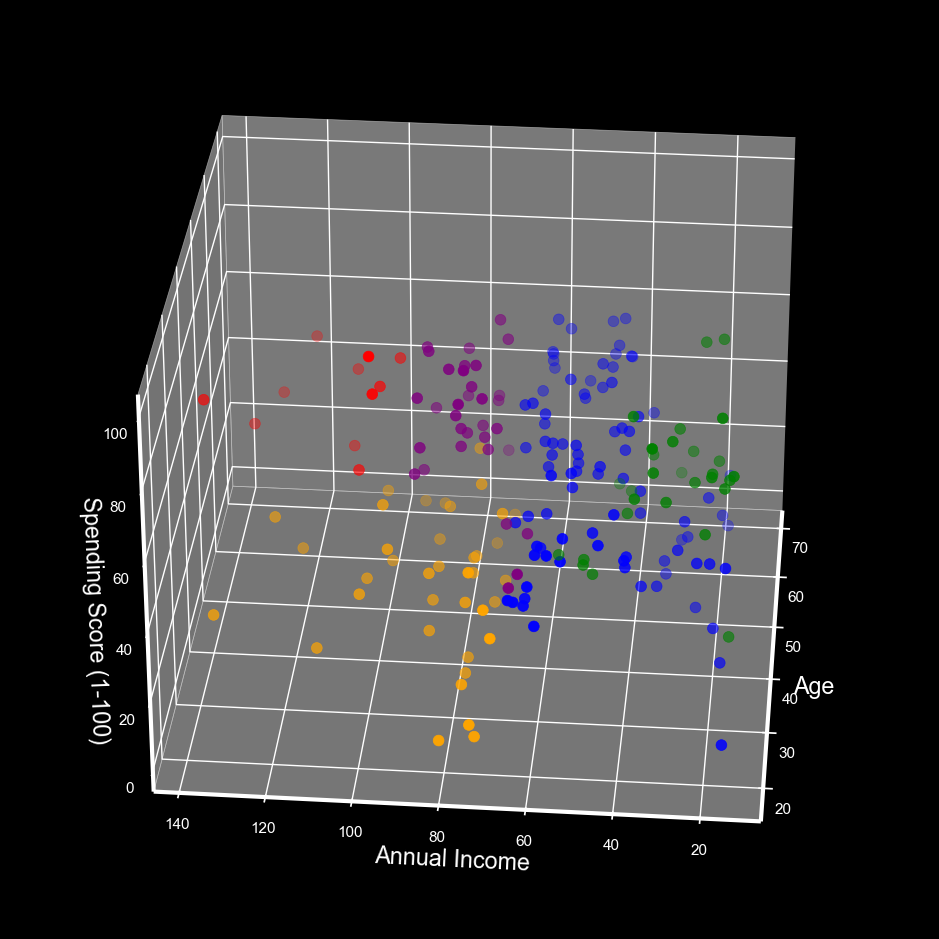

In [887]:
df['label']=label

fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0],df['Annual Income (k$)'][df.label ==0],df['Spending Score (1-100)'][df.label==0],c='blue',s=60)
ax.scatter(df.Age[df.label==1],df['Annual Income (k$)'][df.label ==1],df['Spending Score (1-100)'][df.label==1],c='red',s=60)
ax.scatter(df.Age[df.label==2],df['Annual Income (k$)'][df.label ==2],df['Spending Score (1-100)'][df.label==2],c='green',s=60)
ax.scatter(df.Age[df.label==3],df['Annual Income (k$)'][df.label ==3],df['Spending Score (1-100)'][df.label==3],c='orange',s=60)
ax.scatter(df.Age[df.label==4],df['Annual Income (k$)'][df.label ==4],df['Spending Score (1-100)'][df.label==4],c='purple',s=60)
ax.view_init(30,185)
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [888]:

score = silhouette_score(x2, label_2) 
print("Silhouette Score:", score)

Silhouette Score: 0.553931997444648


In [889]:
db_score = davies_bouldin_score(x2, label_2)
print("Davies-Bouldin Index:", db_score)

Davies-Bouldin Index: 0.5725628995597086


In [890]:
df.groupby('label').mean(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
label,,,
0,46.213483,47.719101,41.797753
1,32.454545,108.181818,82.727273
2,24.689655,29.586207,73.655172
3,40.394737,87.000000,18.631579
4,31.787879,76.090909,77.757576


In [891]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


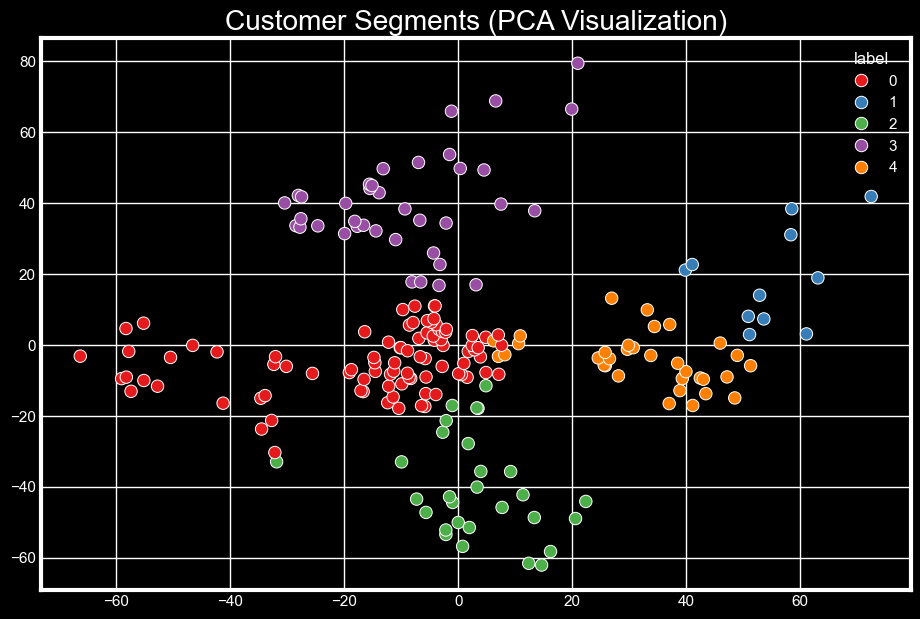

In [892]:
x4=x3
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x4)

plt.figure(figsize=(10,6))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue='label',data=df,palette='Set1',s=80)
plt.title('Customer Segments (PCA Visualization)')
plt.show()

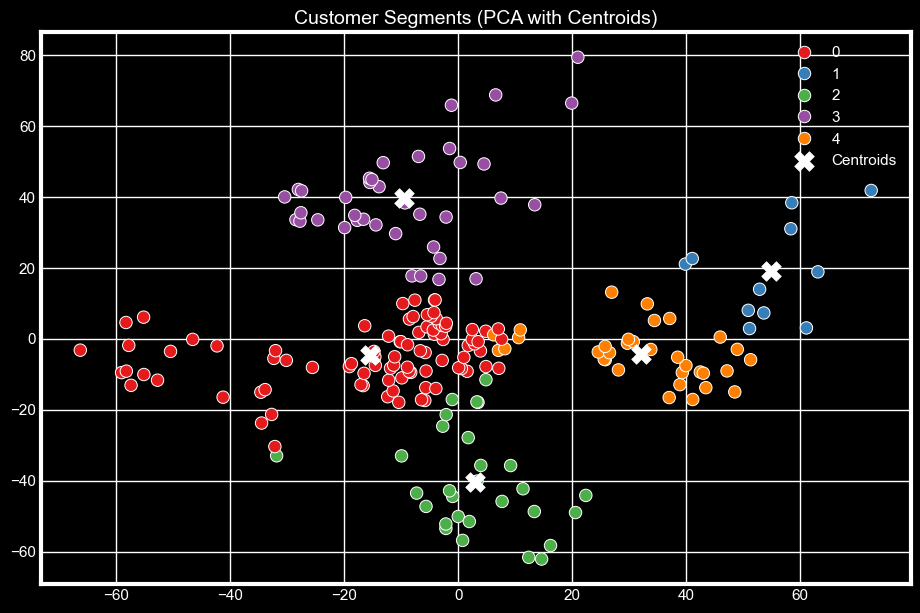

In [893]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

centroids = []
for i in sorted(df['label'].unique()):
    cluster_points = X_pca[df['label'] == i]
    centroids.append(cluster_points.mean(axis=0))
centroids = np.array(centroids)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],data=df, hue='label', palette='Set1', s=80)

plt.scatter(centroids[:,0], centroids[:,1], c='white', s=200, marker='X', label='Centroids')

plt.title("Customer Segments (PCA with Centroids)", fontsize=14)
plt.legend()
plt.show()

In [896]:
conv_matrix=np.cov(X.T)
eigenvalues,eigenvectors=np.linalg.eig(conv_matrix)
print(f"Eigenvalues: \n{eigenvalues}\n")
print(f"Eigenvectors: \n{eigenvectors}")

Eigenvalues: 
[167.22852389 700.26435482 684.33013636]

Eigenvectors: 
[[ 0.97320957  0.1889742  -0.1309652 ]
 [ 0.00551667 -0.58864102 -0.80837573]
 [ 0.22985365 -0.7859965   0.57391358]]


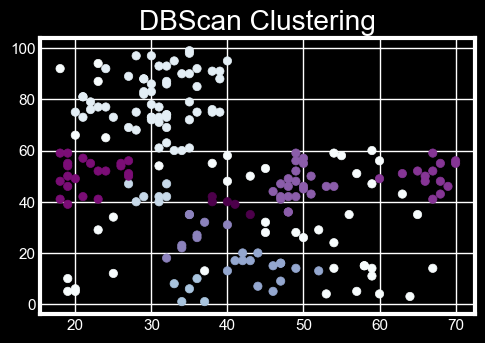

In [897]:
scaler=StandardScaler()
x1_scaled=scaler.fit_transform(x1)

dbscan=DBSCAN(eps=0.25,min_samples=5)
dbscan_labels_1=dbscan.fit_predict(x1_scaled)

plt.figure(figsize=(5,3))
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],c=dbscan_labels_1,cmap='BuPu')
plt.title('DBScan Clustering')
plt.show()

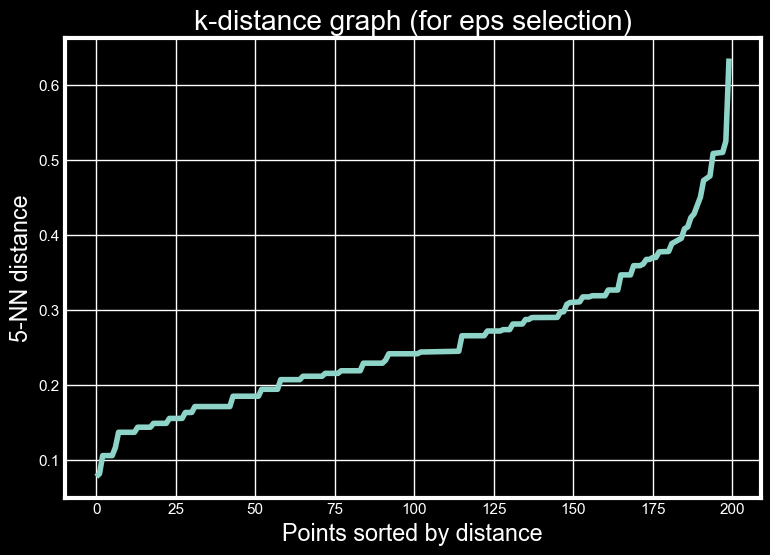

In [898]:
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(x1_scaled)
distances, indices = neighbors_fit.kneighbors(x1_scaled)
distances = np.sort(distances[:, -1])  # take the k-th nearest distance
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("k-distance graph (for eps selection)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN distance")
plt.show()

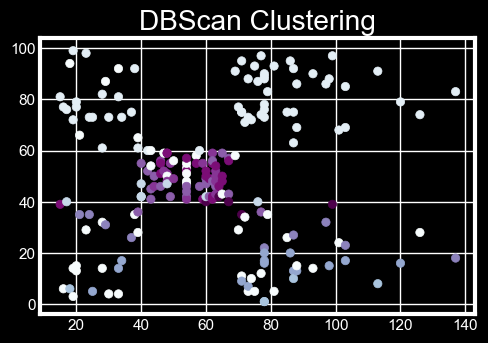

In [899]:
scaler=StandardScaler()
x2_scaled=scaler.fit_transform(x2)

dbscan=DBSCAN(eps=0.41,min_samples=5)
dbscan_labels_2=dbscan.fit_predict(x2_scaled)

plt.figure(figsize=(5,3))
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],c=dbscan_labels_1,cmap='BuPu')
plt.title('DBScan Clustering')
plt.show()

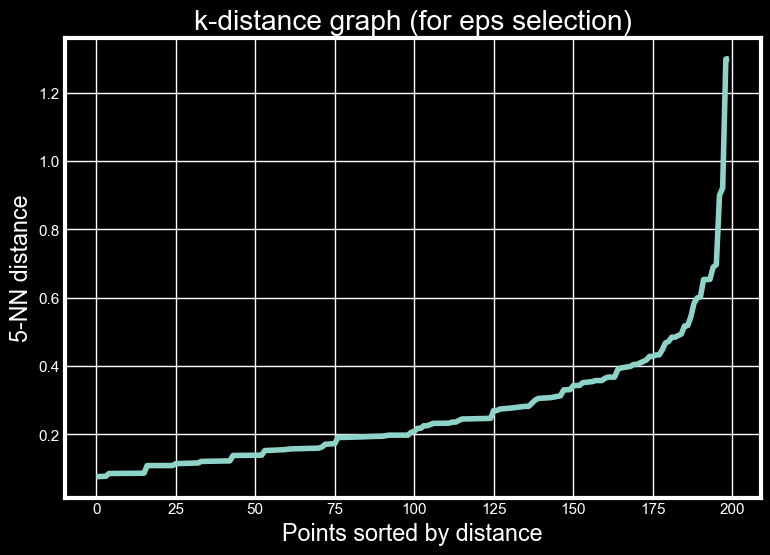

In [900]:
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(x2_scaled)
distances, indices = neighbors_fit.kneighbors(x2_scaled)
distances = np.sort(distances[:, -1])  # take the k-th nearest distance
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("k-distance graph (for eps selection)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN distance")
plt.show()

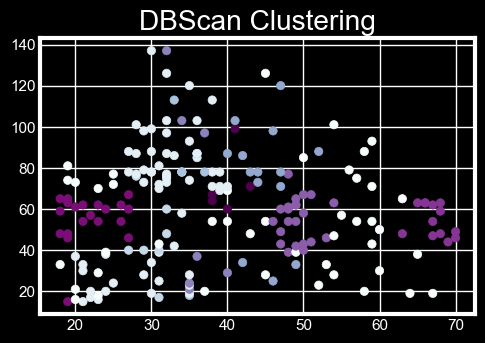

In [901]:
scaler=StandardScaler()
x3_scaled=scaler.fit_transform(x3)

dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan_labels_3=dbscan.fit_predict(x3_scaled)

plt.figure(figsize=(5,3))
plt.scatter(x3.iloc[:,0],x3.iloc[:,1],c=dbscan_labels_1,cmap='BuPu')
plt.title('DBScan Clustering')
plt.show()

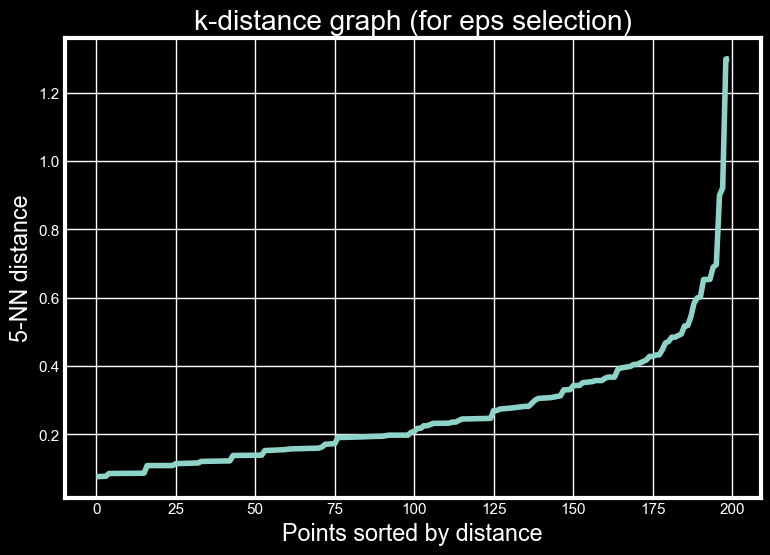

In [903]:
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(x2_scaled)
distances, indices = neighbors_fit.kneighbors(x2_scaled)
distances = np.sort(distances[:, -1])  # take the k-th nearest distance
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("k-distance graph (for eps selection)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN distance")
plt.show()